## Extensive RatInABox example
In this example we:
1. Initialise environment. A rectangular environment of size 2 x 1 meters.
2. Add walls. Dividing the environment into two equal rooms.
3. Add Agent. Place the Agent at coordinates (0.5,0.5). Set the speed scale of the agent to be 20 cm/s.
4. Add place cells. 100 Gaussian threshold place cells. Set the radius to 40 cm. Set their wall geometry to "line_of_sight". Set the location of the last place cells to be near the middle of the doorway at coordinates(1.1,0.5). Set the max firing rate of these place cells to 10 Hz and the min firing rate (e.g. baseline) of 0.1 Hz.
5. Add boundary vector cells. 30 of them.
6. Simulate. For 10 minutes of random motion with a timestep of dt=50 ms.
7. Plot trajectory. Plot final 30 seconds from t=4min30 to t=5mins seconds overlayed onto a heatmap of the trajectory over the full period.
8. Plot timeseries. For 12 randomly chosen boundary vector cells. From t_start = 0 s to t_end = 60 s. Include spikes.
9. Plot place cells. Show a scatter plot of the centres of the place cells.
10. Plot rate maps. For 3 randomly chosen place cells. Then, below this, plot a rate map of the same 3 place cells but as calculated using the firing-rate-weighted position historgram. Include spikes on the latter rate maps.
11. Display the BVC rate maps along with their receptive fields plotted in polar coordinates.
Despite the complexity of the above simulation it requires only ~40 lines of code and takes ~1.5 minutes to run on a laptop (or just 5 seconds whith dt=200 ms, which is still stable).
12. Make a nice multipanel figure
13. Animate a trajectory, on top of a rate map of a BVC

In [1]:
# !pip install ratinabox
# !pip install tqdm # for progress bars

In [2]:
# Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *
from tqdm.notebook import tqdm  # gives time bar

#stylize plots and set figure directory for saving
ratinabox.stylize_plots(); ratinabox.autosave_plots=True; ratinabox.figure_directory="../figures/"

%load_ext autoreload
%autoreload 2

In [3]:
# 1 Initialise environment.
Env = Environment(params={"aspect": 2, "scale": 1})

# 2 Add walls.
Env.add_wall([[1, 0], [1, 0.35]])
Env.add_wall([[1, 0.65], [1, 1]])

# 3 Add Agent.
Ag = Agent(Env)
Ag.pos = np.array([0.5, 0.5])
Ag.speed_mean = 0.2

# 4 Add place cells.
PCs = PlaceCells(
    Ag,
    params={
        "n": 100,
        "description": "gaussian_threshold",
        "widths": 0.40,
        "wall_geometry": "line_of_sight",
        "max_fr": 10,
        "min_fr": 0.1,
        "color": "C1",
    },
)
PCs.place_cell_centres[-1] = np.array([1.1, 0.5])

# 5 Add boundary vector cells.
BVCs = BoundaryVectorCells(Ag, params={"n": 30, "color": "C2"})

# 6 Simulate.
dt = 50e-3
T = 5 * 60 #5 mins

for i in tqdm(range(int(T / dt))):
    Ag.update(dt=dt)
    PCs.update()
    BVCs.update()

  0%|          | 0/6000 [00:00<?, ?it/s]

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/Environment_0220.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/position_heatmap_0220.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/trajectory_0220.png  & .svg


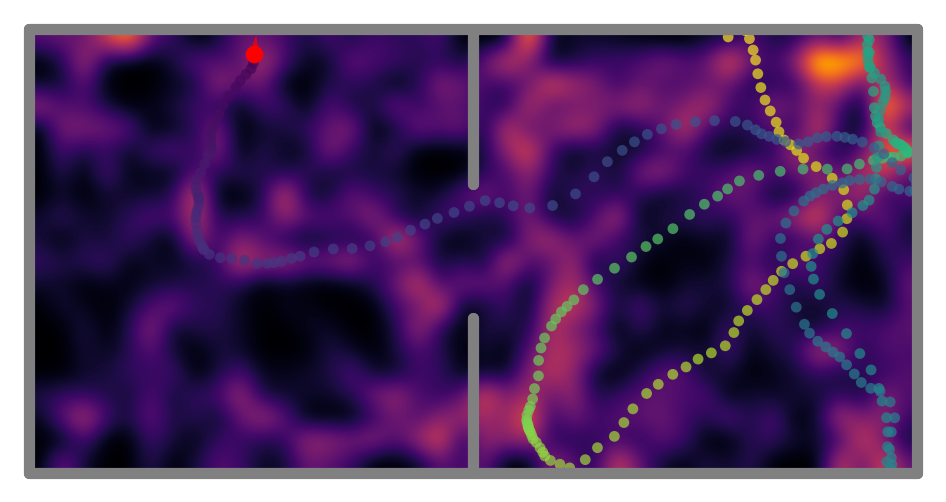

In [4]:
# 7 Plot trajectory.
fig, ax = Ag.plot_position_heatmap()
fig, ax = Ag.plot_trajectory(t_start=Ag.t-30, fig=fig, ax=ax,color="changing")

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/BoundaryVectorCells_firingrate_0220.png  & .svg


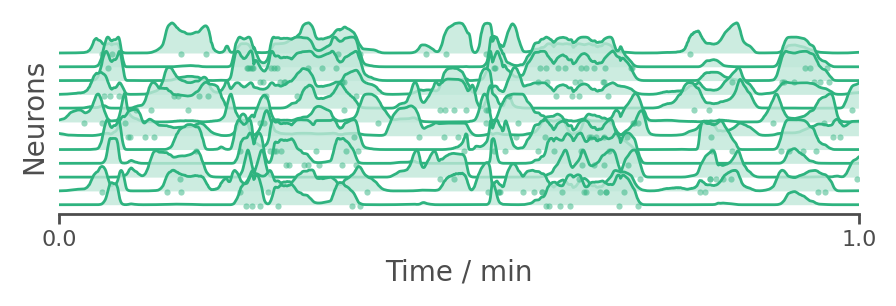

In [5]:
# 8 Plot timeseries.
fig, ax = BVCs.plot_rate_timeseries(
    t_start=0, t_end=60, chosen_neurons="12", spikes=True
)

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/place_cell_locations_0220.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0220.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0220_1.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0220_2.png  & .svg


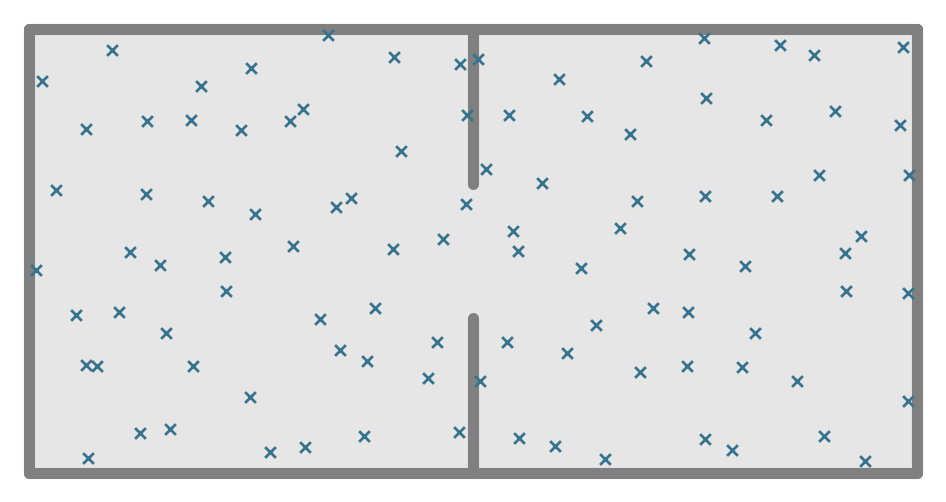

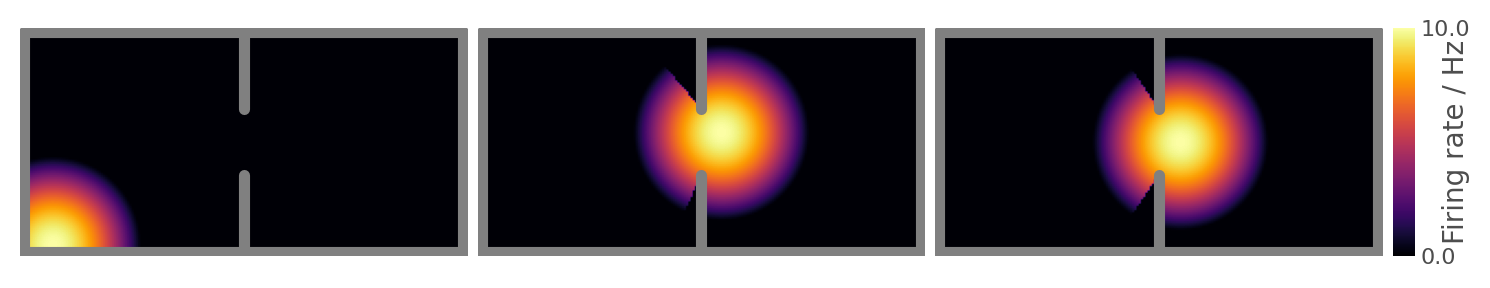

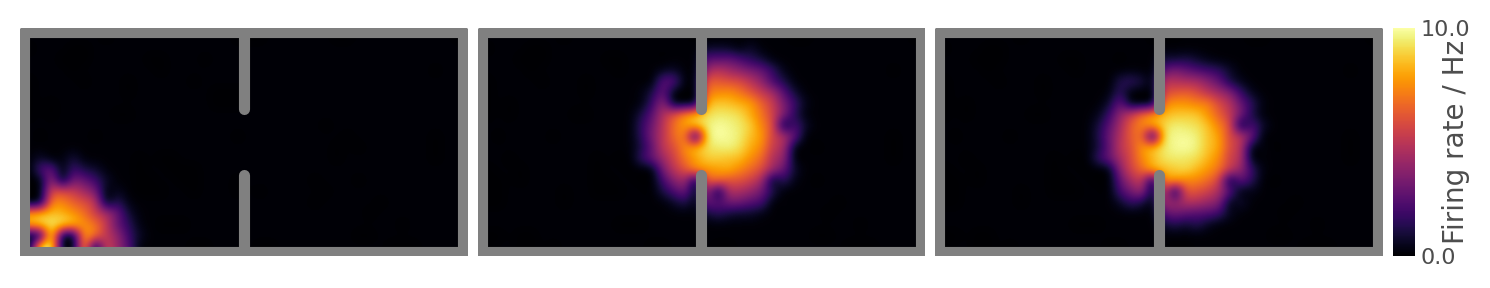

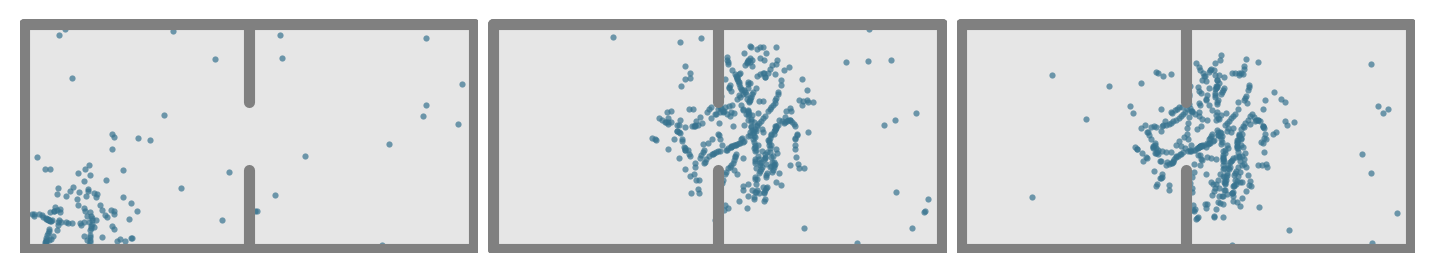

In [6]:
# 9 Plot place cell locations.
fig, ax = PCs.plot_place_cell_locations()

# 10 Plot rate maps (first analytically, second using bin exploration data, third using observed spikes ) .
fig, ax = PCs.plot_rate_map(chosen_neurons="3", method="groundtruth")
fig, ax = PCs.plot_rate_map(chosen_neurons="3", method="history")
fig, ax = PCs.plot_rate_map(chosen_neurons="3", method="neither", spikes=True)

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/BoundaryVectorCells_ratemaps_0221.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/BVC_receptive_fields_0221.png  & .svg


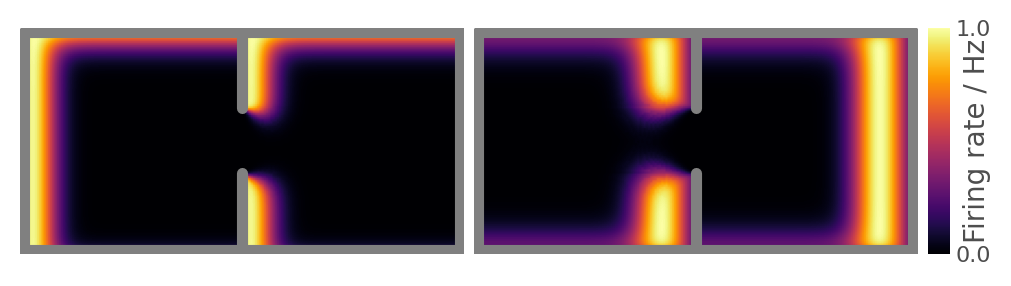

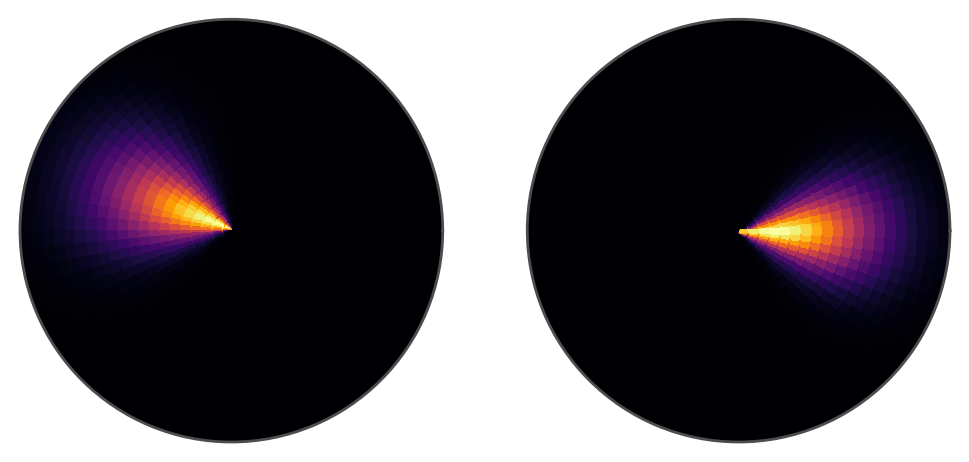

In [7]:
# 11 Display BVC rate maps and polar receptive fields
fig, ax = BVCs.plot_rate_map(chosen_neurons="2")
fig, ax = BVCs.plot_BVC_receptive_field(chosen_neurons="2")

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/trajectory_0221.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/Environment_0221.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/position_heatmap_0221.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0221.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/BoundaryVectorCells_ratemaps_0222.png  & .svg


Text(0.5, 1.0, 'BVC receptive fields')

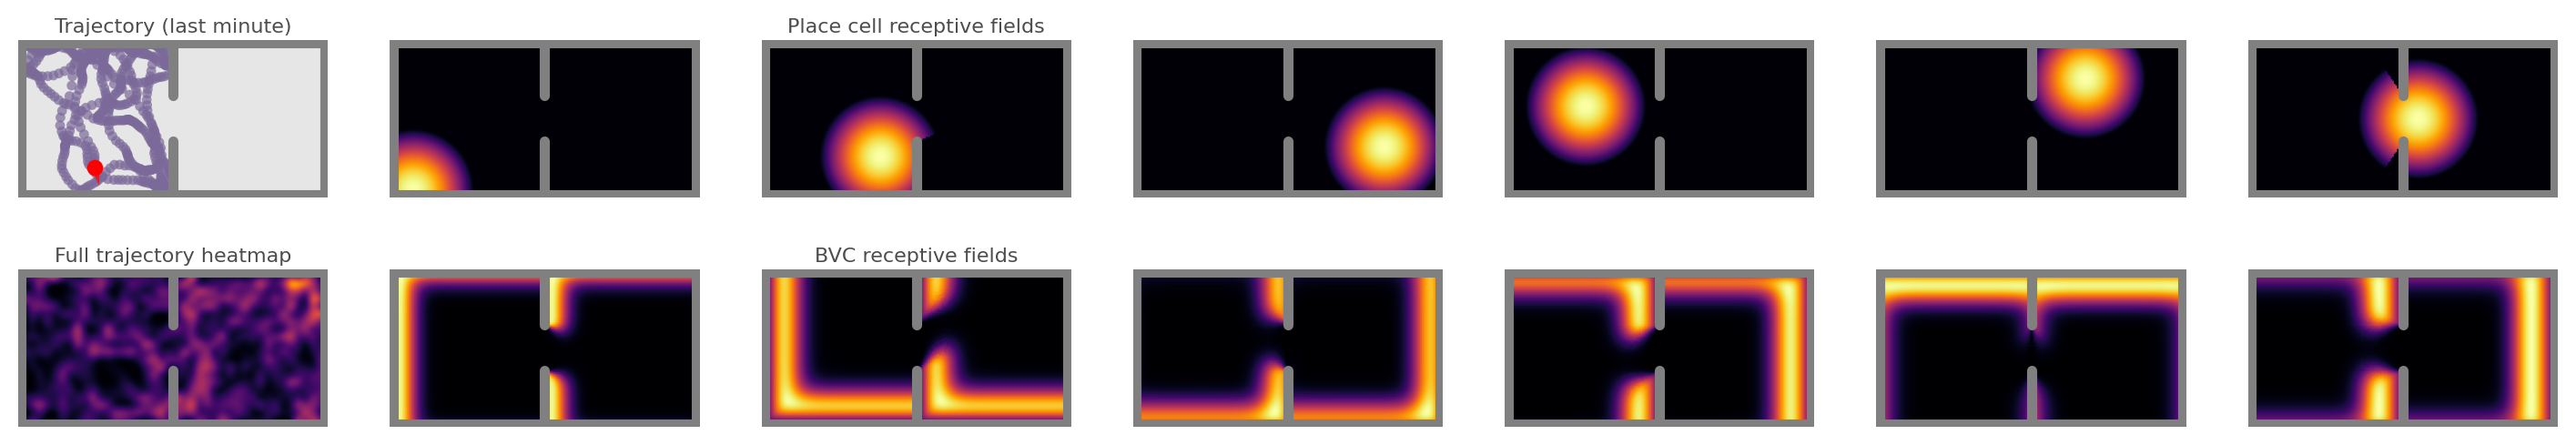

In [8]:
# 12 Multipanel figure
fig, axes = plt.subplots(2, 7,figsize=(18,3))
Ag.plot_trajectory(t_start=0, t_end=60, fig=fig, ax=axes[0, 0])
axes[0, 0].set_title("Trajectory (last minute)")
Ag.plot_position_heatmap(fig=fig, ax=axes[1, 0])
axes[1, 0].set_title("Full trajectory heatmap")
PCs.plot_rate_map(chosen_neurons="6", method="groundtruth", fig=fig, ax=axes[0, 1:],colorbar=False)
axes[0, 2].set_title("Place cell receptive fields")
BVCs.plot_rate_map(chosen_neurons="6", method="groundtruth", fig=fig, ax=axes[1, 1:],colorbar=False)
axes[1, 2].set_title("BVC receptive fields")

In [9]:
# 13 Animate the trajectory (takes a fair while this one)

#create lambda function to plot place cell rate map on top of trajectory
place_cell_plot = lambda fig, ax, **kwargs: PCs.plot_rate_map(fig=fig, ax=ax, chosen_neurons=1, method="groundtruth",colorbar=False)

#animate trajectory
Ag.animate_trajectory(t_end=30,speed_up=5,fps=10,additional_plot_func=place_cell_plot,autosave=False)

Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222_1.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222_2.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222_3.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222_4.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222_5.png  & .svg
Figure saved to /Users/vcandela/Library/CloudStorage/OneDrive-McGillUniversity/Neur 503/figures/17_02_24/PlaceCells_ratemaps_0222_6.png  &